Justin Winfield

DSC 540 - Winter 2019

Final Project

# Setup

In [ ]:
# IMPORT MODULES

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel, SelectKBest, SelectPercentile, chi2
from imblearn.over_sampling import SMOTE

In [95]:
# READ IN DATASET

crash = pd.read_csv("ped_crash.csv")
crash.tail()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault,Injury Severity,Latitude,Longitude,Location
2051,MCP26390030,180005064,Montgomery County Police,Injury Crash,01/30/2018 06:46:00 AM,Maryland (State),ROCKVILLE PIKE,County,MARINELLI RD,NaN,...,Cross/Enter not at Intersection,DART DASH,ON ROADWAY NOT AT CROSSWALK,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED MINOR INJURY,39.046860,-77.112700,"(39.04686, -77.1127)"
2052,MCP3078000V,180005122,Montgomery County Police,Injury Crash,01/30/2018 02:13:00 PM,NaN,NaN,NaN,NaN,GIANT FOOD STORE PARKING LOT \n2900 UNIVERSITY...,...,Cross/Enter not at Intersection,NO IMPROPER ACTIONS,OTHER,NO PED. SIGNAL,MIXED CLOTHING,No,SUSPECTED MINOR INJURY,39.037405,-77.058225,"(39.037405, -77.058225)"
2053,MCP16040017,180005461,Montgomery County Police,Injury Crash,02/01/2018 08:50:00 AM,County,FLOWER HILL WAY,County,HONEYLOCUST CIR,NaN,...,Cross/Enter at Intersection,NO IMPROPER ACTIONS,DRIVEWAY ACCESS MARKED CROSSWALK,NO PED. SIGNAL,REFLECTIVE MATERIAL,No,POSSIBLE INJURY,39.157815,-77.171182,"(39.15781455, -77.17118204)"
2054,MCP3051001B,180005944,Montgomery County Police,Injury Crash,02/03/2018 08:50:00 PM,Maryland (State),OLD GEORGETOWN RD,County,LONE OAK DR,NaN,...,Cross/Enter not at Intersection,FAILURE TO YIELD RIGHT OF WAY,ON ROADWAY NOT AT CROSSWALK,NO PED. SIGNAL,DARK CLOTHING,Yes,SUSPECTED SERIOUS INJURY,39.020092,-77.121952,"(39.02009175, -77.1219521)"
2055,MCP1220006C,180005659,Montgomery County Police,Injury Crash,02/02/2018 09:00:00 AM,County,CARROLL LA,County,SILVER SPRING AVE,NaN,...,Cross/Enter at Intersection,NO IMPROPER ACTIONS,AT INTERSECTION BUT NO CROSSWALK,NO PED. SIGNAL,LIGHT CLOTHING,No,POSSIBLE INJURY,38.991868,-77.016420,"(38.99186833, -77.01642)"


# Preprocessing

In [96]:
# Partitioned the dataset into 3 parts to get more details of the features that contains NaN values
crash_null_1 = crash.iloc[:,1:10]
crash_null_2 = crash.iloc[:,11:20]
crash_null_3 = crash.iloc[:,21:31]

In [97]:
# Checking the shape and see if there are any NaN within the features
print("Shape of the dataframe: ", crash.shape)
print("Other there any null values in the features?\n", crash.isnull().any())

Shape of the dataframe:  (2056, 31)
Other there any null values in the features?
 Report Number                       False
Local Case Number                   False
Agency Name                         False
ACRS Report Type                    False
Crash Date/Time                     False
Route Type                           True
Road Name                            True
Cross-Street Type                    True
Cross-Street Name                    True
Off-Road Description                 True
Municipality                         True
Related Non-Motorist                False
Collision Type                       True
Weather                              True
Surface Condition                    True
Light                                True
Traffic Control                      True
Driver Substance Abuse               True
Non-Motorist Substance Abuse         True
Person ID                           False
Pedestrian Type                     False
Pedestrian Movement                 

In [ ]:
    def nullFeatureCheck(df):
        "Checks the features that contains null values, returns the description of each variable"
        print("-- FEATURE DESCRIPTION -- \n")
        print(df.describe(include="all"), "\n")

In [ ]:
nullFeatureCheck(crash_null_1)

In [100]:
# Of those features in the first partition with missing values, determine if the most and 2nd most frequent term
#print(crash.groupby("Route Type", sort=True)["Report Number"].count(),"\n")
#print(crash.groupby("Cross-Street Type", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Road Name", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Cross-Street Name", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Off-Road Description", sort=True)["Report Number"].count(),"\n")

Road Name
11902 RUSTIC FARM COURT     1
11TH AVE                    1
16TH ST                     7
AIRCRAFT DR                 1
ALLEY                       1
ALTA VISTA RD               1
AMHERST AVE                11
AMITY CT                    1
ANDREW ST                   3
APPLEDOWRE WAY              1
APRIL LA                    1
ARCOLA AVE                  8
ARDENNES AVE                5
ARLINGTON RD                6
ARORA HILLS DR              1
ARROWHEAD RD                1
ASPEN HILL RD               8
ASPEN ST                    1
ASTER BLVD                  1
ATHERTON DR                 2
ATLANTIC AVE                1
AUGUSTA LA                  1
BALTIMORE RD                1
BANK ST                     1
BARNESVILLE RD              1
BARRON ST                   1
BARTON MANOR LA             1
BATTERY LA                  2
BATTLERIDGE PL              1
BAUER DR                    4
                           ..
WASHINGTON GROVE LA         1
WASHINGTONIAN BLVD          4


In [101]:
nullFeatureCheck(crash_null_2)

-- FEATURE DESCRIPTION -- 

       Related Non-Motorist Collision Type Weather Surface Condition  \
count                  2056           2003    1856              1547   
unique                   10             16      11                 7   
top              PEDESTRIAN          OTHER   CLEAR               DRY   
freq                   1499            806    1382              1261   

           Light Traffic Control Driver Substance Abuse  \
count       2040            1750                   1714   
unique         8               9                     12   
top     DAYLIGHT     NO CONTROLS          NONE DETECTED   
freq        1286             831                   1456   

       Non-Motorist Substance Abuse                             Person ID  
count                          1676                                  2056  
unique                            7                                  2056  
top                   NONE DETECTED  6D0FB5A6-09E6-4A13-9187-001F2770AEAB  
freq       

In [102]:
# Of those features in the second partition with missing values, determine if the most and 2nd most frequent term
print(crash.groupby("Collision Type", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Weather", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Surface Condition", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Light", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Traffic Control", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Driver Substance Abuse", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Non-Motorist Substance Abuse", sort=True)["Report Number"].count(),"\n")

Collision Type
ANGLE MEETS LEFT HEAD ON          2
ANGLE MEETS LEFT TURN             7
ANGLE MEETS RIGHT TURN            5
HEAD ON                          13
HEAD ON LEFT TURN                55
OPPOSITE DIRECTION SIDESWIPE      4
OTHER                           806
SAME DIR REAR END                60
SAME DIR REND LEFT TURN           2
SAME DIR REND RIGHT TURN          2
SAME DIRECTION LEFT TURN          8
SAME DIRECTION RIGHT TURN        13
SAME DIRECTION SIDESWIPE         25
SINGLE VEHICLE                  700
STRAIGHT MOVEMENT ANGLE         298
UNKNOWN                           3
Name: Report Number, dtype: int64 

Weather
BLOWING SNOW       3
CLEAR           1382
CLOUDY           195
FOGGY              9
OTHER              9
RAINING          216
SEVERE WINDS       4
SLEET              2
SNOW              18
UNKNOWN            9
WINTRY MIX         9
Name: Report Number, dtype: int64 

Surface Condition
DRY        1261
ICE           9
OTHER         2
SLUSH         3
SNOW         11


In [103]:
nullFeatureCheck(crash_null_3)

-- FEATURE DESCRIPTION -- 

                Pedestrian Movement   Pedestrian Actions  \
count                          2003                 1945   
unique                           15                   14   
top     Cross/Enter at Intersection  NO IMPROPER ACTIONS   
freq                            931                 1043   
mean                            NaN                  NaN   
std                             NaN                  NaN   
min                             NaN                  NaN   
25%                             NaN                  NaN   
50%                             NaN                  NaN   
75%                             NaN                  NaN   
max                             NaN                  NaN   

            Pedestrian Location Pedestrian Obeyed Traffic Signal  \
count                      2004                             1463   
unique                       16                                6   
top     ON ROADWAY AT CROSSWALK                

In [104]:
# Of those features in the third partition with missing values, determine if the most and 2nd most frequent term
print(crash.groupby("Pedestrian Actions", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Pedestrian Obeyed Traffic Signal", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Pedestrian Visibility", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("At Fault", sort=True)["Report Number"].count(),"\n")
print(crash.groupby("Pedestrian Obeyed Traffic Signal", sort=True)["Report Number"].count(),"\n")

Pedestrian Actions
DART DASH                                            167
DISABLED VEHICLE RELATED                               7
ENTERING EXITING PARKED STANDING VEHICLE               9
FAILURE TO OBEY TRAFFIC SIGNS SIGNALS OR OFFICER      68
FAILURE TO YIELD RIGHT OF WAY                        104
IMPROPER PASSING                                       5
IMPROPER TURN MERGE                                    2
IN ROADWAY IMPROPERLY                                167
INATTENTIVE                                           67
NO IMPROPER ACTIONS                                 1043
NOT VISIBLE                                           45
OTHER                                                106
UNKNOWN                                              144
WRONG WAY RIDING OR WALKING                           11
Name: Report Number, dtype: int64 

Pedestrian Obeyed Traffic Signal
DISOBEYED PED. SIGNAL      149
NO PED. SIGNAL             775
OBEYED PED. SIGNAL         393
OTHER                

In [105]:
# Filling in missing values with the most common value per feature
## Not filling missing values for Off-Road Description, Cross-Street Name, and Road Name
crash["Collision Type"].fillna("OTHER", axis=0, inplace=True)
crash["Route Type"].fillna("County", axis=0, inplace=True)
crash["Cross-Street Type"].fillna("County", axis=0, inplace=True)
crash["Weather"].fillna("CLEAR", axis=0, inplace=True)
crash["Surface Condition"].fillna("DRY", axis=0, inplace=True)
crash["Traffic Control"].fillna("NO CONTROLS", axis=0, inplace=True)
crash["Driver Substance Abuse"].fillna("NONE DETECTED", axis=0, inplace=True)
crash["Non-Motorist Substance Abuse"].fillna("NONE DETECTED", axis=0, inplace=True)
crash["Pedestrian Actions"].fillna("NO IMPROPER ACTIONS", axis=0, inplace=True)
crash["Pedestrian Location"].fillna("ON ROADWAY AT CROSSWALK", axis=0, inplace=True)
crash["Pedestrian Obeyed Traffic Signal"].fillna("NO PED. SIGNAL", axis=0, inplace=True)
crash["Pedestrian Visibility"].fillna("MIXED CLOTHING", axis=0, inplace=True)
crash["Municipality"].fillna("ROCKVILLE", axis=0, inplace=True)
crash["Pedestrian Movement"].fillna("Cross/Enter at Intersection", axis=0, inplace=True)
crash["At Fault"].fillna("No", axis=0, inplace=True)

In [106]:
# Check to see if all features except ones mentioned are filled in. Also checking on shape
print("Other there any null values in the features?\n", crash.isnull().any())
print("Shape of the dataframe post processing: ", crash.shape)

Other there any null values in the features?
 Report Number                       False
Local Case Number                   False
Agency Name                         False
ACRS Report Type                    False
Crash Date/Time                     False
Route Type                          False
Road Name                            True
Cross-Street Type                   False
Cross-Street Name                    True
Off-Road Description                 True
Municipality                        False
Related Non-Motorist                False
Collision Type                      False
Weather                             False
Surface Condition                   False
Light                                True
Traffic Control                     False
Driver Substance Abuse              False
Non-Motorist Substance Abuse        False
Person ID                           False
Pedestrian Type                     False
Pedestrian Movement                 False
Pedestrian Actions            

# Exploratory

In [107]:
# Let's check and see what the distribution looks like for the target variable, "Injury Severity"
crash.groupby("Injury Severity").size()

Injury Severity
FATAL INJURY                 37
NO APPARENT INJURY          178
POSSIBLE INJURY             674
SUSPECTED MINOR INJURY      947
SUSPECTED SERIOUS INJURY    220
dtype: int64

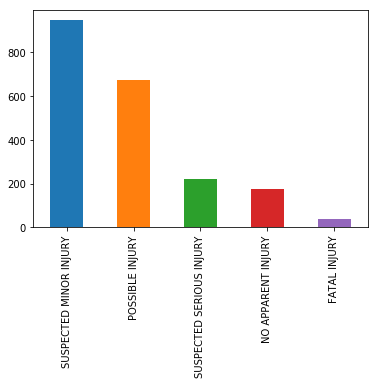

In [108]:
crash["Injury Severity"].value_counts().plot(kind="bar")

In [109]:
# Let's separate the target variable from the rest of the dataframe
crash_attr = crash.iloc[:,2:27]
crash_target = crash["Injury Severity"]
crash_attr.describe(include="all")

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,...,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault
count,2056,2056,2056,2056,1611,2056,1611,445,2056,2056,...,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
unique,8,3,1950,8,501,10,786,419,12,10,...,12,7,2056,7,15,14,16,6,9,3
top,Montgomery County Police,Injury Crash,11/09/2017 11:35:00 AM,County,GEORGIA AVE,County,GEORGIA AVE,PARKING LOT OF\n 11820 PARKLAWN DR,ROCKVILLE,PEDESTRIAN,...,NONE DETECTED,NONE DETECTED,6D0FB5A6-09E6-4A13-9187-001F2770AEAB,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,ON ROADWAY AT CROSSWALK,NO PED. SIGNAL,MIXED CLOTHING,No
freq,1442,1881,3,1233,105,1315,39,3,1972,1499,...,1798,1875,1,1501,984,1154,588,1368,1000,1420


In [110]:
crash_target.replace("NO APPARENT INJURY", 0, inplace=True)
crash_target.replace("POSSIBLE INJURY", 0, inplace=True)
crash_target.replace("SUSPECTED MINOR INJURY", 1, inplace=True)
crash_target.replace("SUSPECTED SERIOUS INJURY", 1, inplace=True)
crash_target.replace("FATAL INJURY", 1, inplace=True)

In [111]:
crash_target.tail()

2051    1
2052    1
2053    0
2054    1
2055    0
Name: Injury Severity, dtype: int64

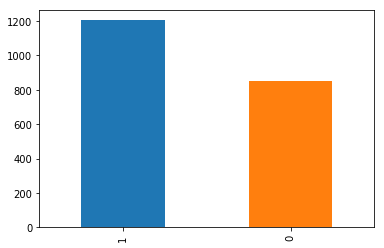

In [112]:
crash_target.value_counts().plot(kind="bar")

In [113]:
#crash_attr.drop(columns=["Crash Date/Time", "Road Name", "Cross-Street Type", "Off-Road Description", "Person ID"], inplace=True)
crash_attr.drop(columns=["Crash Date/Time", "Road Name", "Cross-Street Name", "Off-Road Description", "Person ID"], inplace=True)


In [114]:
crash_attr.tail()

,Agency Name,ACRS Report Type,Route Type,Cross-Street Type,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Pedestrian Type,Pedestrian Movement,Pedestrian Actions,Pedestrian Location,Pedestrian Obeyed Traffic Signal,Pedestrian Visibility,At Fault
2051,Montgomery County Police,Injury Crash,Maryland (State),County,ROCKVILLE,PEDESTRIAN,STRAIGHT MOVEMENT ANGLE,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,NONE DETECTED,PEDESTRIAN,Cross/Enter not at Intersection,DART DASH,ON ROADWAY NOT AT CROSSWALK,DISOBEYED PED. SIGNAL,DARK CLOTHING,Yes
2052,Montgomery County Police,Injury Crash,County,County,ROCKVILLE,PEDESTRIAN,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NONE DETECTED,PEDESTRIAN,Cross/Enter not at Intersection,NO IMPROPER ACTIONS,OTHER,NO PED. SIGNAL,MIXED CLOTHING,No
2053,Montgomery County Police,Injury Crash,County,County,ROCKVILLE,PEDESTRIAN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,PERSON,NONE DETECTED,NONE DETECTED,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,DRIVEWAY ACCESS MARKED CROSSWALK,NO PED. SIGNAL,REFLECTIVE MATERIAL,No
2054,Montgomery County Police,Injury Crash,Maryland (State),County,ROCKVILLE,PEDESTRIAN,OTHER,CLEAR,DRY,DARK NO LIGHTS,NO CONTROLS,NONE DETECTED,ALCOHOL PRESENT,PEDESTRIAN,Cross/Enter not at Intersection,FAILURE TO YIELD RIGHT OF WAY,ON ROADWAY NOT AT CROSSWALK,NO PED. SIGNAL,DARK CLOTHING,Yes
2055,Montgomery County Police,Injury Crash,County,County,ROCKVILLE,PEDESTRIAN,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NONE DETECTED,PEDESTRIAN,Cross/Enter at Intersection,NO IMPROPER ACTIONS,AT INTERSECTION BUT NO CROSSWALK,NO PED. SIGNAL,LIGHT CLOTHING,No


In [115]:
# Creating dummy variables
crash_attr = pd.get_dummies(crash_attr)
crash_attr.tail()

,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,Agency Name_MONTGOMERY,Agency Name_Maryland-National Capital,Agency Name_Montgomery County Police,Agency Name_ROCKVILLE,Agency Name_Rockville Police Departme,ACRS Report Type_Fatal Crash,ACRS Report Type_Injury Crash,...,Pedestrian Visibility_HEAD LIGHT AND REFLECTORS,Pedestrian Visibility_LIGHT CLOTHING,Pedestrian Visibility_MIXED CLOTHING,Pedestrian Visibility_OTHER,Pedestrian Visibility_REAR REFLECTOR,Pedestrian Visibility_REFLECTIVE MATERIAL,Pedestrian Visibility_UNKNOWN,At Fault_No,At Fault_Unknown,At Fault_Yes
2051,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2052,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2053,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2054,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2055,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


# Model Building

In [116]:
# Convert the train and target to numpy arrays to be numeric
crash_attr_arry = np.asarray(crash_attr)
crash_target_arry = np.asarray(crash_target)

In [117]:
# Train/Test Data
data_train, data_test, target_train, target_test = train_test_split(crash_attr_arry, crash_target_arry, test_size=0.2)
rs = 2688


In [118]:
data_train1, data_test1, target_train1, target_test1 = train_test_split(crash_attr, crash_target, test_size=0.2, random_state = rs)

In [119]:
data_train1.head(2)

,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,Agency Name_MONTGOMERY,Agency Name_Maryland-National Capital,Agency Name_Montgomery County Police,Agency Name_ROCKVILLE,Agency Name_Rockville Police Departme,ACRS Report Type_Fatal Crash,ACRS Report Type_Injury Crash,...,Pedestrian Visibility_HEAD LIGHT AND REFLECTORS,Pedestrian Visibility_LIGHT CLOTHING,Pedestrian Visibility_MIXED CLOTHING,Pedestrian Visibility_OTHER,Pedestrian Visibility_REAR REFLECTOR,Pedestrian Visibility_REFLECTIVE MATERIAL,Pedestrian Visibility_UNKNOWN,At Fault_No,At Fault_Unknown,At Fault_Yes
915,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
288,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [120]:
target_train1.head(2)

915    1
288    1
Name: Injury Severity, dtype: int64

In [121]:
data_test1.head(2)

,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,Agency Name_MONTGOMERY,Agency Name_Maryland-National Capital,Agency Name_Montgomery County Police,Agency Name_ROCKVILLE,Agency Name_Rockville Police Departme,ACRS Report Type_Fatal Crash,ACRS Report Type_Injury Crash,...,Pedestrian Visibility_HEAD LIGHT AND REFLECTORS,Pedestrian Visibility_LIGHT CLOTHING,Pedestrian Visibility_MIXED CLOTHING,Pedestrian Visibility_OTHER,Pedestrian Visibility_REAR REFLECTOR,Pedestrian Visibility_REFLECTIVE MATERIAL,Pedestrian Visibility_UNKNOWN,At Fault_No,At Fault_Unknown,At Fault_Yes
870,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1597,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [122]:
target_test1.head(2)

870     1
1597    1
Name: Injury Severity, dtype: int64

In [123]:
data_train1.shape, data_test1.shape

((1644, 191), (412, 191))

### Baseline - No Feature Selection

In [124]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_features=None, 
                            random_state=rs)
dt.fit(data_train1, target_train1)

# Training Performance
score_acc_dt = dt.score(data_train1, target_train1)
score_acc_dt_cv5 = model_selection.cross_val_score(dt, data_train1, target_train1, cv=5)
score_acc_dt_cv10 = model_selection.cross_val_score(dt, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_dt_test = dt.score(data_test1, target_test1)
score_acc_dt_cv5_test = model_selection.cross_val_score(dt, data_test1, target_test1, cv=5)
score_acc_dt_cv10_test = model_selection.cross_val_score(dt, data_test1, target_test1, cv=10)

# Prediction
dt_pred = dt.predict(data_test1)

In [125]:
# k-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3, 
                           weights="distance")

knn.fit(data_train1, target_train1)

# Training Performance
score_acc_knn = knn.score(data_train1, target_train1)
score_acc_knn_cv5 = model_selection.cross_val_score(knn, data_train1, target_train1, cv=5)
score_acc_knn_cv10 = model_selection.cross_val_score(knn, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_knn_test = knn.score(data_test1, target_test1)
score_acc_knn_cv5_test = model_selection.cross_val_score(knn, data_test1, target_test1, cv=5)
score_acc_knn_cv10_test = model_selection.cross_val_score(knn, data_test1, target_test1, cv=10)

# Prediction
knn_pred = knn.predict(data_test1)

In [126]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 100,
                            max_depth = None, 
                            min_samples_split = 3, 
                            criterion = "entropy", 
                            random_state = rs)
rf.fit(data_train1, target_train1)

# Training Performance
score_acc_rf = rf.score(data_train1, target_train1)
score_acc_rf_cv5 = model_selection.cross_val_score(rf, data_train1, target_train1, cv=5)
score_acc_rf_cv10 = model_selection.cross_val_score(rf, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_rf_test = rf.score(data_test, target_test)
score_acc_rf_cv5_test = model_selection.cross_val_score(rf, data_test1, target_test1, cv=5)
score_acc_rf_cv10_test = model_selection.cross_val_score(rf, data_test1, target_test1, cv=10)

# Prediction
rf_pred = rf.predict(data_test1)

In [127]:
# Support Vector Machines (SVM)
svm = SVC(kernel="sigmoid", 
          gamma="scale", 
          C=1.0, 
          probability=True, 
          random_state=rs)

svm.fit(data_train1, target_train1)

# Training Performance
score_acc_svm = svm.score(data_train1, target_train1)
score_acc_svm_cv5 = model_selection.cross_val_score(svm, data_train1, target_train1, cv=5)
score_acc_svm_cv10 = model_selection.cross_val_score(svm, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_svm_test = svm.score(data_test, target_test)
score_acc_svm_cv5_test = model_selection.cross_val_score(svm, data_test1, target_test1, cv=5)
score_acc_svm_cv10_test = model_selection.cross_val_score(svm, data_test1, target_test1, cv=10)

# Prediction
svm_pred = svm.predict(data_test1)

In [128]:
# Naive Bayes
nb = GaussianNB()
nb.fit(data_train1, target_train1)

# Training Performance
score_acc_nb = nb.score(data_train1, target_train1)
score_acc_nb_cv5 = model_selection.cross_val_score(nb, data_train1, target_train1, cv=5)
score_acc_nb_cv10 = model_selection.cross_val_score(nb, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_nb_test = nb.score(data_test1, target_test1)
score_acc_nb_cv5_test = model_selection.cross_val_score(nb, data_test1, target_test1, cv=5)
score_acc_nb_cv10_test = model_selection.cross_val_score(nb, data_test1, target_test1, cv=10)

# Prediction
nb_pred = nb.predict(data_test1)

In [129]:
# Neural Network
ann = MLPClassifier(activation='logistic', 
                    solver='lbfgs', 
                    alpha=0.0001, 
                    max_iter=1000, 
                    hidden_layer_sizes=(96,), 
                    random_state=rs)

ann.fit(data_train1, target_train1)

# Training Performance
score_acc_ann = ann.score(data_train1, target_train1)
score_acc_ann_cv5 = model_selection.cross_val_score(ann, data_train1, target_train1, cv=5)
score_acc_ann_cv10 = model_selection.cross_val_score(ann, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_ann_test = ann.score(data_test1, target_test1)
score_acc_ann_cv5_test = model_selection.cross_val_score(ann, data_test1, target_test1, cv=5)
score_acc_ann_cv10_test = model_selection.cross_val_score(ann, data_test1, target_test1, cv=10)

# Prediction
ann_pred = ann.predict(data_test1)

In [130]:
# Gradient Boosting
grad = GradientBoostingClassifier(n_estimators=100, 
                                  loss="deviance", 
                                  learning_rate=0.1, 
                                  max_depth=3, 
                                  min_samples_split=3,
                                  random_state=rs)

grad.fit(data_train1, target_train1)

# Training Performance
score_acc_grad = grad.score(data_train1, target_train1)
score_acc_grad_cv5 = model_selection.cross_val_score(grad, data_train1, target_train1, cv=5)
score_acc_grad_cv10 = model_selection.cross_val_score(grad, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_grad_test = grad.score(data_test1, target_test1)
score_acc_grad_cv5_test = model_selection.cross_val_score(grad, data_test1, target_test1, cv=5)
score_acc_grad_cv10_test = model_selection.cross_val_score(grad, data_test1, target_test1, cv=10)

# Prediction
grad_pred = grad.predict(data_test1)

In [131]:
# Ada Boosting
ada = AdaBoostClassifier(n_estimators=100, 
                          base_estimator=None, 
                          learning_rate=0.1, 
                          random_state=rs)
ada.fit(data_train1, target_train1)

# Training Performance
score_acc_ada = ada.score(data_train1, target_train1)
score_acc_ada_cv5 = model_selection.cross_val_score(ada, data_train1, target_train1, cv=5)
score_acc_ada_cv10 = model_selection.cross_val_score(ada, data_train1, target_train1, cv=10)

# Testing Performance
score_acc_ada_test = ada.score(data_test1, target_test1)
score_acc_ada_cv5_test = model_selection.cross_val_score(ada, data_test1, target_test1, cv=5)
score_acc_ada_cv10_test = model_selection.cross_val_score(ada, data_test1, target_test1, cv=10)

# Prediction
ada_pred = ada.predict(data_test1)

### Feature Selection - Find the most important features

In [184]:
# Size of the dataset w/o target - A reminder of how many features are loaded
print("Shape of data_train1: ", crash_attr.shape)

# Low Variance Threshold
sel = VarianceThreshold()
x1_train = sel.fit_transform(crash_attr)

print("Shape of x1_train: ", crash_attr.shape)

# Univariate Feature Selection - SelectKBest
x2_train = SelectKBest(chi2, k="all").fit_transform(crash_attr, crash_target)
print("Shape of x2_train: ", crash_attr.shape)

# Univariate Feature Selection - SelectPercentile
x3_train = SelectPercentile(chi2, percentile=75).fit_transform(crash_attr, crash_target)
print("Shape of x3_train: ", x3_train.shape)

Shape of data_train1:  (2056, 191)
Shape of x1_train:  (2056, 191)
Shape of x2_train:  (2056, 191)
Shape of x3_train:  (2056, 143)


In [185]:
x3_train = SelectPercentile(chi2, percentile=75)
feat = x3_train.get_params(deep=True)
#x3_train.names_

In [186]:
# Now with 48 most important features selected - Time to train/test split again
data_train2, data_test2, target_train2, target_test2 = train_test_split(x3_train, crash_target, test_size=0.2)
rs = 2688

TypeError: Singleton array array(SelectPercentile(percentile=75, score_func=<function chi2 at 0x1a157497b8>),
      dtype=object) cannot be considered a valid collection.

In [183]:
data_train2

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [137]:
data_train2.shape, data_test2.shape, target_train2.shape, target_test2.shape

((1644, 143), (412, 143), (1644,), (412,))

In [138]:
# Decision Tree
dt2 = DecisionTreeClassifier(criterion='entropy', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_features=None, 
                            random_state=rs)
dt2.fit(data_train2, target_train2)

# Training Performance
score_acc_dt2 = dt2.score(data_train2, target_train2)
score_acc_dt2_cv5 = model_selection.cross_val_score(dt2, data_train2, target_train2, cv=5)
score_acc_dt2_cv10 = model_selection.cross_val_score(dt2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_dt2_test = dt2.score(data_test2, target_test2)
score_acc_dt2_cv5_test = model_selection.cross_val_score(dt2, data_test2, target_test2, cv=5)
score_acc_dt2_cv10_test = model_selection.cross_val_score(dt2, data_test2, target_test2, cv=10)

# Prediction
dt2_pred = dt2.predict(data_test2)

In [139]:
# k-Nearest Neighbor
knn2 = KNeighborsClassifier(n_neighbors=3, 
                           weights="distance")

knn2.fit(data_train2, target_train2)

# Training Performance
score_acc_knn2 = knn2.score(data_train2, target_train2)
score_acc_knn2_cv5 = model_selection.cross_val_score(knn2, data_train2, target_train2, cv=5)
score_acc_knn2_cv10 = model_selection.cross_val_score(knn2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_knn2_test = knn2.score(data_test2, target_test2)
score_acc_knn2_cv5_test = model_selection.cross_val_score(knn2, data_test2, target_test2, cv=5)
score_acc_knn2_cv10_test = model_selection.cross_val_score(knn2, data_test2, target_test2, cv=10)

# Prediction
knn2_pred = knn2.predict(data_test2)

In [140]:
# Random Forest
rf2 = RandomForestClassifier(n_estimators = 100,
                            max_depth = None, 
                            min_samples_split = 3, 
                            criterion = "entropy", 
                            random_state = rs)
rf2.fit(data_train2, target_train2)

# Training Performance
score_acc_rf2 = rf2.score(data_train2, target_train2)
score_acc_rf2_cv5 = model_selection.cross_val_score(rf2, data_train2, target_train2, cv=5)
score_acc_rf2_cv10 = model_selection.cross_val_score(rf2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_rf2_test = rf2.score(data_test2, target_test2)
score_acc_rf2_cv5_test = model_selection.cross_val_score(rf2, data_test2, target_test2, cv=5)
score_acc_rf2_cv10_test = model_selection.cross_val_score(rf2, data_test2, target_test2, cv=10)

# Prediction
rf2_pred = rf2.predict(data_test2)

In [141]:
# Support Vector Machines (SVM)
svm2 = SVC(kernel="sigmoid", 
          gamma="scale", 
          C=1.0, 
          probability=True, 
          random_state=rs)

svm2.fit(data_train2, target_train2)

# Training Performance
score_acc_svm2 = svm2.score(data_train2, target_train2)
score_acc_svm2_cv5 = model_selection.cross_val_score(svm2, data_train2, target_train2, cv=5)
score_acc_svm2_cv10 = model_selection.cross_val_score(svm2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_svm2_test = svm2.score(data_test2, target_test2)
score_acc_svm2_cv5_test = model_selection.cross_val_score(svm2, data_test2, target_test2, cv=5)
score_acc_svm2_cv10_test = model_selection.cross_val_score(svm2, data_test2, target_test2, cv=10)

# Prediction
svm2_pred = svm2.predict(data_test2)

In [142]:
# Naive Bayes
nb2 = GaussianNB()
nb2.fit(data_train2, target_train2)

# Training Performance
score_acc_nb2 = nb2.score(data_train2, target_train2)
score_acc_nb2_cv5 = model_selection.cross_val_score(nb2, data_train2, target_train2, cv=5)
score_acc_nb2_cv10 = model_selection.cross_val_score(nb2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_nb2_test = nb2.score(data_test2, target_test2)
score_acc_nb2_cv5_test = model_selection.cross_val_score(nb2, data_test2, target_test2, cv=5)
score_acc_nb2_cv10_test = model_selection.cross_val_score(nb2, data_test2, target_test2, cv=10)

# Prediction
nb2_pred = nb2.predict(data_test2)

In [143]:
# Neural Network
ann2 = MLPClassifier(activation='logistic', 
                    solver='lbfgs', 
                    alpha=0.0001, 
                    max_iter=1000, 
                    hidden_layer_sizes=(24,), 
                    random_state=rs)

ann2.fit(data_train2, target_train2)

# Training Performance
score_acc_ann2 = ann2.score(data_train2, target_train2)
score_acc_ann2_cv5 = model_selection.cross_val_score(ann2, data_train2, target_train2, cv=5)
score_acc_ann2_cv10 = model_selection.cross_val_score(ann2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_ann2_test = ann2.score(data_test2, target_test2)
score_acc_ann2_cv5_test = model_selection.cross_val_score(ann2, data_test2, target_test2, cv=5)
score_acc_ann2_cv10_test = model_selection.cross_val_score(ann2, data_test2, target_test2, cv=10)

# Prediction
ann2_pred = ann2.predict(data_test2)

In [144]:
# Gradient Boosting
grad2 = GradientBoostingClassifier(n_estimators=100, 
                                  loss="deviance", 
                                  learning_rate=0.1, 
                                  max_depth=3, 
                                  min_samples_split=3,
                                  random_state=rs)

grad2.fit(data_train2, target_train2)

# Training Performance
score_acc_grad2 = grad2.score(data_train2, target_train2)
score_acc_grad2_cv5 = model_selection.cross_val_score(grad2, data_train2, target_train2, cv=5)
score_acc_grad2_cv10 = model_selection.cross_val_score(grad2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_grad2_test = grad2.score(data_test2, target_test2)
score_acc_grad2_cv5_test = model_selection.cross_val_score(grad2, data_test2, target_test2, cv=5)
score_acc_grad2_cv10_test = model_selection.cross_val_score(grad2, data_test2, target_test2, cv=10)

# Prediction
grad2_pred = grad2.predict(data_test2)

In [145]:
# Ada Boosting
ada2 = AdaBoostClassifier(n_estimators=100, 
                          base_estimator=None, 
                          learning_rate=0.1, 
                          random_state=rs)
ada2.fit(data_train2, target_train2)

# Training Performance
score_acc_ada2 = ada2.score(data_train2, target_train2)
score_acc_ada2_cv5 = model_selection.cross_val_score(ada2, data_train2, target_train2, cv=5)
score_acc_ada2_cv10 = model_selection.cross_val_score(ada2, data_train2, target_train2, cv=10)

# Testing Performance
score_acc_ada2_test = ada2.score(data_test2, target_test2)
score_acc_ada2_cv5_test = model_selection.cross_val_score(ada2, data_test2, target_test2, cv=5)
score_acc_ada2_cv10_test = model_selection.cross_val_score(ada2, data_test2, target_test2, cv=10)

# Prediction
ada2_pred = ada2.predict(data_test2)

### Resampling by Oversampling via SMOTE

In [146]:
# We still have our original train and test datasets (data_train1, data_test1, target_train1, target_test1) with all features
# Let's oversample using SMOTE to have more cases for Injury

smt = SMOTE()
data_train3, target_train3 = smt.fit_sample(data_train1, target_train1)
np.bincount(target_train3) # Equal number of cases between the 2 classes

array([964, 964])

In [147]:
data_train3.shape, target_train3.shape

((1928, 191), (1928,))

In [148]:
# Decision Tree
dt3 = DecisionTreeClassifier(criterion='entropy', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_features=None, 
                            random_state=rs)
dt3.fit(data_train3, target_train3)

# Training Performance
score_acc_dt3 = dt3.score(data_train3, target_train3)
score_acc_dt3_cv5 = model_selection.cross_val_score(dt3, data_train3, target_train3, cv=5)
score_acc_dt3_cv10 = model_selection.cross_val_score(dt3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_dt3_test = dt.score(data_test, target_test)
score_acc_dt3_cv5_test = model_selection.cross_val_score(dt3, data_test, target_test, cv=5)
score_acc_dt3_cv10_test = model_selection.cross_val_score(dt3, data_test, target_test, cv=10)

# Prediction
dt3_pred = dt3.predict(data_test)

In [187]:
# k-Nearest Neighbor
knn3 = KNeighborsClassifier(n_neighbors=3, 
                           weights="distance")

knn3.fit(data_train3, target_train3)

# Training Performance
score_acc_knn3 = knn3.score(data_train3, target_train3)
score_acc_knn3_cv5 = model_selection.cross_val_score(knn3, data_train3, target_train3, cv=5)
score_acc_knn3_cv10 = model_selection.cross_val_score(knn3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_knn3_test = knn.score(data_test, target_test)
score_acc_knn3_cv5_test = model_selection.cross_val_score(knn3, data_test, target_test, cv=5)
score_acc_knn3_cv10_test = model_selection.cross_val_score(knn3, data_test, target_test, cv=10)

# Prediction
knn3_pred = knn3.predict(data_test)

In [150]:
# Random Forest
rf3 = RandomForestClassifier(n_estimators = 100,
                            max_depth = None, 
                            min_samples_split = 3, 
                            criterion = "entropy", 
                            random_state = rs)
rf3.fit(data_train3, target_train3)

# Training Performance
score_acc_rf3 = rf3.score(data_train3, target_train3)
score_acc_rf3_cv5 = model_selection.cross_val_score(rf3, data_train3, target_train3, cv=5)
score_acc_rf3_cv10 = model_selection.cross_val_score(rf3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_rf3_test = rf3.score(data_test, target_test)
score_acc_rf3_cv5_test = model_selection.cross_val_score(rf3, data_test, target_test, cv=5)
score_acc_rf3_cv10_test = model_selection.cross_val_score(rf3, data_test, target_test, cv=10)

# Prediction
rf3_pred = rf3.predict(data_test)

In [151]:
# Support Vector Machines (SVM)
svm3 = SVC(kernel="sigmoid", 
          gamma="scale", 
          C=1.0, 
          probability=True, 
          random_state=rs)

svm3.fit(data_train3, target_train3)

# Training Performance
score_acc_svm3 = svm3.score(data_train3, target_train3)
score_acc_svm3_cv5 = model_selection.cross_val_score(svm3, data_train3, target_train3, cv=5)
score_acc_svm3_cv10 = model_selection.cross_val_score(svm3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_svm3_test = svm3.score(data_test, target_test)
score_acc_svm3_cv5_test = model_selection.cross_val_score(svm3, data_test, target_test, cv=5)
score_acc_svm3_cv10_test = model_selection.cross_val_score(svm3, data_test, target_test, cv=10)

# Prediction
svm3_pred = svm3.predict(data_test)

In [152]:
# Naive Bayes
nb3 = GaussianNB()
nb3.fit(data_train3, target_train3)

# Training Performance
score_acc_nb3 = nb3.score(data_train3, target_train3)
score_acc_nb3_cv5 = model_selection.cross_val_score(nb3, data_train3, target_train3, cv=5)
score_acc_nb3_cv10 = model_selection.cross_val_score(nb3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_nb3_test = nb3.score(data_test, target_test)
score_acc_nb3_cv5_test = model_selection.cross_val_score(nb3, data_test, target_test, cv=5)
score_acc_nb3_cv10_test = model_selection.cross_val_score(nb3, data_test, target_test, cv=10)

# Prediction
nb3_pred = nb3.predict(data_test)

In [153]:
# Neural Network
ann3 = MLPClassifier(activation='logistic', 
                    solver='lbfgs', 
                    alpha=0.0001, 
                    max_iter=1000, 
                    hidden_layer_sizes=(24,), 
                    random_state=rs)

ann3.fit(data_train3, target_train3)

# Training Performance
score_acc_ann3 = ann3.score(data_train3, target_train3)
score_acc_ann3_cv5 = model_selection.cross_val_score(ann3, data_train3, target_train3, cv=5)
score_acc_ann3_cv10 = model_selection.cross_val_score(ann3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_ann3_test = ann3.score(data_test, target_test)
score_acc_ann3_cv5_test = model_selection.cross_val_score(ann3, data_test, target_test, cv=5)
score_acc_ann3_cv10_test = model_selection.cross_val_score(ann3, data_test, target_test, cv=10)

# Prediction
ann3_pred = ann3.predict(data_test)

In [154]:
# Gradient Boosting
grad3 = GradientBoostingClassifier(n_estimators=100, 
                                  loss="deviance", 
                                  learning_rate=0.1, 
                                  max_depth=3, 
                                  min_samples_split=3,
                                  random_state=rs)

grad3.fit(data_train3, target_train3)

# Training Performance
score_acc_grad3 = grad3.score(data_train3, target_train3)
score_acc_grad3_cv5 = model_selection.cross_val_score(grad3, data_train3, target_train3, cv=5)
score_acc_grad3_cv10 = model_selection.cross_val_score(grad3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_grad3_test = grad3.score(data_test, target_test)
score_acc_grad3_cv5_test = model_selection.cross_val_score(grad3, data_test, target_test, cv=5)
score_acc_grad3_cv10_test = model_selection.cross_val_score(grad3, data_test, target_test, cv=10)

# Prediction
grad3_pred = grad3.predict(data_test)

In [155]:
# Ada Boosting
ada3 = AdaBoostClassifier(n_estimators=100, 
                          base_estimator=None, 
                          learning_rate=0.1, 
                          random_state=rs)
ada3.fit(data_train3, target_train3)

# Training Performance
score_acc_ada3 = ada3.score(data_train3, target_train3)
score_acc_ada3_cv5 = model_selection.cross_val_score(ada3, data_train3, target_train3, cv=5)
score_acc_ada3_cv10 = model_selection.cross_val_score(ada3, data_train3, target_train3, cv=10)

# Testing Performance
score_acc_ada3_test = ada3.score(data_test, target_test)
score_acc_ada3_cv5_test = model_selection.cross_val_score(ada3, data_test, target_test, cv=5)
score_acc_ada3_cv10_test = model_selection.cross_val_score(ada3, data_test, target_test, cv=10)

# Prediction
ada3_pred = ada3.predict(data_test)

### Oversampling w/ SMOTE & Feature Selection

In [156]:
smt_fs = SMOTE()
data_train4, target_train4 = smt_fs.fit_sample(data_train2, target_train2)
np.bincount(target_train4) # Equal number of cases between the 2 classes

array([955, 955])

In [157]:
data_train4.shape, target_train4.shape, data_test2.shape, target_test2.shape

((1910, 143), (1910,), (412, 143), (412,))

In [158]:
data_test2.shape

(412, 143)

In [159]:
# Decision Tree
dt4 = DecisionTreeClassifier(criterion='entropy', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            max_features=None, 
                            random_state=rs)
dt4.fit(data_train4, target_train4)

# Training Performance
score_acc_dt4 = dt4.score(data_train4, target_train4)
score_acc_dt4_cv5 = model_selection.cross_val_score(dt4, data_train4, target_train4, cv=5)
score_acc_dt4_cv10 = model_selection.cross_val_score(dt4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_dt4_test = dt4.score(data_test2, target_test2)
score_acc_dt4_cv5_test = model_selection.cross_val_score(dt4, data_test2, target_test2, cv=5)
score_acc_dt4_cv10_test = model_selection.cross_val_score(dt4, data_test2, target_test2, cv=10)

# Prediction
dt4_pred = dt4.predict(data_test2)

In [160]:
# k-Nearest Neighbor
knn4 = KNeighborsClassifier(n_neighbors=3, 
                           weights="distance")

knn4.fit(data_train4, target_train4)

# Training Performance
score_acc_knn4 = knn4.score(data_train4, target_train4)
score_acc_knn4_cv5 = model_selection.cross_val_score(knn4, data_train4, target_train4, cv=5)
score_acc_knn4_cv10 = model_selection.cross_val_score(knn4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_knn4_test = knn4.score(data_test2, target_test2)
score_acc_knn4_cv5_test = model_selection.cross_val_score(knn4, data_test2, target_test2, cv=5)
score_acc_knn4_cv10_test = model_selection.cross_val_score(knn4, data_test2, target_test2, cv=10)

# Prediction
knn4_pred = knn4.predict(data_test2)

In [161]:
# Random Forest
rf4 = RandomForestClassifier(n_estimators = 100,
                            max_depth = None, 
                            min_samples_split = 3, 
                            criterion = "entropy", 
                            random_state = rs)
rf4.fit(data_train4, target_train4)

# Training Performance
score_acc_rf4 = rf4.score(data_train4, target_train4)
score_acc_rf4_cv5 = model_selection.cross_val_score(rf4, data_train4, target_train4, cv=5)
score_acc_rf4_cv10 = model_selection.cross_val_score(rf4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_rf4_test = rf4.score(data_test2, target_test2)
score_acc_rf4_cv5_test = model_selection.cross_val_score(rf4, data_test2, target_test2, cv=5)
score_acc_rf4_cv10_test = model_selection.cross_val_score(rf4, data_test2, target_test2, cv=10)

# Prediction
rf4_pred = rf4.predict(data_test2)

In [162]:
# Support Vector Machines (SVM)
svm4 = SVC(kernel="sigmoid", 
          gamma="scale", 
          C=1.0, 
          probability=True, 
          random_state=rs)

svm4.fit(data_train4, target_train4)

# Training Performance
score_acc_svm4 = svm4.score(data_train4, target_train4)
score_acc_svm4_cv5 = model_selection.cross_val_score(svm4, data_train4, target_train4, cv=5)
score_acc_svm4_cv10 = model_selection.cross_val_score(svm4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_svm4_test = svm4.score(data_test2, target_test2)
score_acc_svm4_cv5_test = model_selection.cross_val_score(svm4, data_test2, target_test2, cv=5)
score_acc_svm4_cv10_test = model_selection.cross_val_score(svm4, data_test2, target_test2, cv=10)

# Prediction
svm4_pred = svm4.predict(data_test2)

In [163]:
# Naive Bayes
nb4 = GaussianNB()
nb4.fit(data_train4, target_train4)

# Training Performance
score_acc_nb4 = nb4.score(data_train4, target_train4)
score_acc_nb4_cv5 = model_selection.cross_val_score(nb4, data_train4, target_train4, cv=5)
score_acc_nb4_cv10 = model_selection.cross_val_score(nb4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_nb4_test = nb4.score(data_test2, target_test2)
score_acc_nb4_cv5_test = model_selection.cross_val_score(nb4, data_test2, target_test2, cv=5)
score_acc_nb4_cv10_test = model_selection.cross_val_score(nb4, data_test2, target_test2, cv=10)

# Prediction
nb4_pred = nb4.predict(data_test2)

In [164]:
# Neural Network
ann4 = MLPClassifier(activation='logistic', 
                    solver='lbfgs', 
                    alpha=0.0001, 
                    max_iter=1000, 
                    hidden_layer_sizes=(24,), 
                    random_state=rs)

ann4.fit(data_train4, target_train4)

# Training Performance
score_acc_ann4 = ann4.score(data_train4, target_train4)
score_acc_ann4_cv5 = model_selection.cross_val_score(ann4, data_train4, target_train4, cv=5)
score_acc_ann4_cv10 = model_selection.cross_val_score(ann4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_ann4_test = ann4.score(data_test2, target_test2)
score_acc_ann4_cv5_test = model_selection.cross_val_score(ann4, data_test2, target_test2, cv=5)
score_acc_ann4_cv10_test = model_selection.cross_val_score(ann4, data_test2, target_test2, cv=10)

# Prediction
ann4_pred = ann4.predict(data_test2)

In [165]:
# Gradient Boosting
grad4 = GradientBoostingClassifier(n_estimators=100, 
                                  loss="deviance", 
                                  learning_rate=0.1, 
                                  max_depth=3, 
                                  min_samples_split=3,
                                  random_state=rs)

grad4.fit(data_train4, target_train4)

# Training Performance
score_acc_grad4 = grad4.score(data_train4, target_train4)
score_acc_grad4_cv5 = model_selection.cross_val_score(grad4, data_train4, target_train4, cv=5)
score_acc_grad4_cv10 = model_selection.cross_val_score(grad4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_grad4_test = grad4.score(data_test2, target_test2)
score_acc_grad4_cv5_test = model_selection.cross_val_score(grad4, data_test2, target_test2, cv=5)
score_acc_grad4_cv10_test = model_selection.cross_val_score(grad4, data_test2, target_test2, cv=10)

# Prediction
grad4_pred = grad4.predict(data_test2)

In [166]:
# Ada Boosting
ada4 = AdaBoostClassifier(n_estimators=100, 
                          base_estimator=None, 
                          learning_rate=0.1, 
                          random_state=rs)
ada4.fit(data_train4, target_train4)

# Training Performance
score_acc_ada4 = ada4.score(data_train4, target_train4)
score_acc_ada4_cv5 = model_selection.cross_val_score(ada4, data_train4, target_train4, cv=5)
score_acc_ada4_cv10 = model_selection.cross_val_score(ada4, data_train4, target_train4, cv=10)

# Testing Performance
score_acc_ada4_test = ada4.score(data_test2, target_test2)
score_acc_ada4_cv5_test = model_selection.cross_val_score(ada4, data_test2, target_test2, cv=5)
score_acc_ada4_cv10_test = model_selection.cross_val_score(ada4, data_test2, target_test2, cv=10)

# Prediction
ada4_pred = ada4.predict(data_test2)

# Results

### Decision Tree

In [167]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training %0.3f (+/- %0.3f)" % (score_acc_dt.mean(), score_acc_dt.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt_cv5.mean(), score_acc_dt_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt_cv10.mean(), score_acc_dt_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_dt_test.mean(), score_acc_dt_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt_cv5_test.mean(), score_acc_dt_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt_cv10_test.mean(), score_acc_dt_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test1, dt_pred))
print("Classification Report :\n", classification_report(target_test1, dt_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\n WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training %0.3f (+/- %0.3f)" % (score_acc_dt2.mean(), score_acc_dt2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt2_cv5.mean(), score_acc_dt2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt2_cv10.mean(), score_acc_dt2_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_dt2_test.mean(), score_acc_dt2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt2_cv5_test.mean(), score_acc_dt2_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt2_cv10_test.mean(), score_acc_dt2_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, dt2_pred))
print("Classification Report :\n", classification_report(target_test2, dt2_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training %0.3f (+/- %0.3f)" % (score_acc_dt3.mean(), score_acc_dt3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt3_cv5.mean(), score_acc_dt3_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt3_cv10.mean(), score_acc_dt3_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_dt3_test.mean(), score_acc_dt3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt3_cv5_test.mean(), score_acc_dt3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt3_cv10_test.mean(), score_acc_dt3_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test, dt3_pred))
print("Classification Report :\n", classification_report(target_test, dt3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training %0.3f (+/- %0.3f)" % (score_acc_dt4.mean(), score_acc_dt4.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt4_cv5.mean(), score_acc_dt4_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt4_cv10.mean(), score_acc_dt4_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_dt4_test.mean(), score_acc_dt4_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt4_cv5_test.mean(), score_acc_dt4_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_dt4_cv10_test.mean(), score_acc_dt4_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, dt4_pred))
print("Classification Report :\n", classification_report(target_test2, dt4_pred, target_names=["No Injury", "Injury"]))

NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training 0.984 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.606 (+/- 0.039)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.620 (+/- 0.060)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Test: 0.585 (+/- 0.000)
Overall Accuracy for Test w/ 5-fold Cross Validation: 0.568 (+/- 0.070)
Overall Accuracy for Test w/ 10-fold Cross Validation: 0.580 (+/- 0.135)


--- OTHER METRICS --- 

Confusion Matrix:
 [[ 88  84]
 [ 87 153]]
Classification Report :
               precision    recall  f1-score   support

   No Injury       0.50      0.51      0.51       172
      Injury       0.65      0.64      0.64       240

   micro avg       0.58      0.58      0.58       412
   macro avg       0.57      0.57      0.57       412
weighted avg       0.59      0.58      0.59       412


 WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training 0.971 (+/- 0.00

### k-Nearest Neighbor

In [168]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_knn.mean(), score_acc_knn.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn_cv5.mean(), score_acc_knn_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn_cv10.mean(), score_acc_knn_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_knn_test.mean(), score_acc_knn_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn_cv5_test.mean(), score_acc_knn_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn_cv10_test.mean(), score_acc_knn_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test1, knn_pred))
print("Classification Report :\n", classification_report(target_test1, knn_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\n WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_knn2.mean(), score_acc_knn2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn2_cv5.mean(), score_acc_knn2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn2_cv10.mean(), score_acc_knn2_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_knn2_test.mean(), score_acc_knn2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn2_cv5_test.mean(), score_acc_knn2_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn2_cv10_test.mean(), score_acc_knn2_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, knn2_pred))
print("Classification Report :\n", classification_report(target_test2, knn2_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_knn3.mean(), score_acc_knn3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn3_cv5.mean(), score_acc_knn3_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn3_cv10.mean(), score_acc_knn3_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_knn3_test.mean(), score_acc_knn3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn3_cv5_test.mean(), score_acc_knn3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn3_cv10_test.mean(), score_acc_knn3_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test, knn3_pred))
print("Classification Report :\n", classification_report(target_test, knn3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_knn4.mean(), score_acc_knn4.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn4_cv5.mean(), score_acc_knn4_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn4_cv10.mean(), score_acc_knn4_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_knn4_test.mean(), score_acc_knn4_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn4_cv5_test.mean(), score_acc_knn4_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_knn4_cv10_test.mean(), score_acc_knn4_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, knn4_pred))
print("Classification Report :\n", classification_report(target_test2, knn4_pred, target_names=["No Injury", "Injury"]))

NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.984 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.594 (+/- 0.044)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.597 (+/- 0.070)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Test: 0.558 (+/- 0.000)
Overall Accuracy for Test w/ 5-fold Cross Validation: 0.575 (+/- 0.125)
Overall Accuracy for Test w/ 10-fold Cross Validation: 0.578 (+/- 0.138)


--- OTHER METRICS --- 

Confusion Matrix:
 [[ 58 114]
 [ 68 172]]
Classification Report :
               precision    recall  f1-score   support

   No Injury       0.46      0.34      0.39       172
      Injury       0.60      0.72      0.65       240

   micro avg       0.56      0.56      0.56       412
   macro avg       0.53      0.53      0.52       412
weighted avg       0.54      0.56      0.54       412


 WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.971 (+/- 0.

### Random Forest

In [195]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_rf.mean(), score_acc_rf.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf_cv5.mean(), score_acc_rf_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf_cv10.mean(), score_acc_rf_cv10.std() * 2))


print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_rf_test.mean(), score_acc_rf_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf_cv5_test.mean(), score_acc_rf_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf_cv10_test.mean(), score_acc_rf_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test1, rf_pred))
print("Classification Report:\n", classification_report(target_test1, rf_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\n WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_rf2.mean(), score_acc_rf2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf2_cv5.mean(), score_acc_rf2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf2_cv10.mean(), score_acc_rf2_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_rf2_test.mean(), score_acc_rf2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf2_cv5_test.mean(), score_acc_rf2_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf2_cv10_test.mean(), score_acc_rf2_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, rf2_pred))
print("Classification Report:\n", classification_report(target_test2, rf2_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_rf3.mean(), score_acc_rf3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf3_cv5.mean(), score_acc_rf3_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf3_cv10.mean(), score_acc_rf3_cv10.std() * 2))


print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_rf3_test.mean(), score_acc_rf3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf3_cv5_test.mean(), score_acc_rf3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf3_cv10_test.mean(), score_acc_rf3_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test, rf3_pred))
print("Classification Report:\n", classification_report(target_test, rf3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_rf4.mean(), score_acc_rf4.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf4_cv5.mean(), score_acc_rf4_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf4_cv10.mean(), score_acc_rf4_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_rf4_test.mean(), score_acc_rf4_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf4_cv5_test.mean(), score_acc_rf4_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_rf4_cv10_test.mean(), score_acc_rf4_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, rf4_pred))
print("Classification Report:\n", classification_report(target_test2, rf4_pred, target_names=["No Injury", "Injury"]))



NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.983 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.645 (+/- 0.048)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.655 (+/- 0.069)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Test: 0.917 (+/- 0.000)
Overall Accuracy for Test w/ 5-fold Cross Validation: 0.612 (+/- 0.071)
Overall Accuracy for Test w/ 10-fold Cross Validation: 0.631 (+/- 0.130)


--- OTHER METRICS --- 

Confusion Matrix:
 [[ 66 106]
 [ 46 194]]
Classification Report:
               precision    recall  f1-score   support

   No Injury       0.59      0.38      0.46       172
      Injury       0.65      0.81      0.72       240

   micro avg       0.63      0.63      0.63       412
   macro avg       0.62      0.60      0.59       412
weighted avg       0.62      0.63      0.61       412


 WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.968 (+/- 0.0

### Support Vector Machines

In [170]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_svm.mean(), score_acc_svm.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm_cv5.mean(), score_acc_svm_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm_cv10.mean(), score_acc_svm_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_svm_test.mean(), score_acc_svm_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm_cv5_test.mean(), score_acc_svm_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm_cv10_test.mean(), score_acc_svm_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test1, svm_pred))
print("Classification Report:\n", classification_report(target_test1, svm_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\n WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_svm2.mean(), score_acc_svm2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm2_cv5.mean(), score_acc_svm2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm2_cv10.mean(), score_acc_svm2_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_svm2_test.mean(), score_acc_svm2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm2_cv5_test.mean(), score_acc_svm2_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm2_cv10_test.mean(), score_acc_svm2_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, svm2_pred))
print("Classification Report:\n", classification_report(target_test2, svm2_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_svm3.mean(), score_acc_svm3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm3_cv5.mean(), score_acc_svm3_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm3_cv10.mean(), score_acc_svm3_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_svm3_test.mean(), score_acc_svm3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm3_cv5_test.mean(), score_acc_svm3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm3_cv10_test.mean(), score_acc_svm3_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test, svm3_pred))
print("Classification Report:\n", classification_report(target_test, svm3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_svm4.mean(), score_acc_svm4.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm4_cv5.mean(), score_acc_svm4_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm4_cv10.mean(), score_acc_svm4_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_svm2_test.mean(), score_acc_svm2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm4_cv5_test.mean(), score_acc_svm4_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_svm4_cv10_test.mean(), score_acc_svm4_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, svm4_pred))
print("Classification Report:\n", classification_report(target_test2, svm4_pred, target_names=["No Injury", "Injury"]))

NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.651 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.651 (+/- 0.023)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.651 (+/- 0.044)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Test: 0.597 (+/- 0.000)
Overall Accuracy for Test w/ 5-fold Cross Validation: 0.587 (+/- 0.023)
Overall Accuracy for Test w/ 10-fold Cross Validation: 0.590 (+/- 0.028)


--- OTHER METRICS --- 

Confusion Matrix:
 [[ 32 140]
 [  0 240]]
Classification Report:
               precision    recall  f1-score   support

   No Injury       1.00      0.19      0.31       172
      Injury       0.63      1.00      0.77       240

   micro avg       0.66      0.66      0.66       412
   macro avg       0.82      0.59      0.54       412
weighted avg       0.79      0.66      0.58       412


 WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.644 (+/- 0.0

### Naive Bayes

In [171]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_nb.mean(), score_acc_nb.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb_cv5.mean(), score_acc_nb_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb_cv10.mean(), score_acc_nb_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_nb_test.mean(), score_acc_nb_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb_cv5_test.mean(), score_acc_nb_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb_cv10_test.mean(), score_acc_nb_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test1, nb_pred))
print("Classification Report:\n", classification_report(target_test1, nb_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\nWITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_nb2.mean(), score_acc_nb2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb2_cv5.mean(), score_acc_nb2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb2_cv10.mean(), score_acc_nb2_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_nb2_test.mean(), score_acc_nb2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb2_cv5_test.mean(), score_acc_nb2_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb2_cv10_test.mean(), score_acc_nb2_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, nb2_pred))
print("Classification Report:\n", classification_report(target_test2, nb2_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_nb3.mean(), score_acc_nb3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb3_cv5.mean(), score_acc_nb_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb3_cv10.mean(), score_acc_nb_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_nb3_test.mean(), score_acc_nb3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb3_cv5_test.mean(), score_acc_nb3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb3_cv10_test.mean(), score_acc_nb3_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test, nb3_pred))
print("Classification Report:\n", classification_report(target_test, nb3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_nb4.mean(), score_acc_nb4.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb4_cv5.mean(), score_acc_nb4_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb4_cv10.mean(), score_acc_nb4_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_nb4_test.mean(), score_acc_nb4_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb4_cv5_test.mean(), score_acc_nb4_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_nb4_cv10_test.mean(), score_acc_nb4_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, nb4_pred))
print("Classification Report:\n", classification_report(target_test2, nb4_pred, target_names=["No Injury", "Injury"]))

NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.507 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.464 (+/- 0.042)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.467 (+/- 0.065)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Test: 0.502 (+/- 0.000)
Overall Accuracy for Test w/ 5-fold Cross Validation: 0.473 (+/- 0.064)
Overall Accuracy for Test w/ 10-fold Cross Validation: 0.463 (+/- 0.084)


--- OTHER METRICS --- 

Confusion Matrix:
 [[162  10]
 [195  45]]
Classification Report:
               precision    recall  f1-score   support

   No Injury       0.45      0.94      0.61       172
      Injury       0.82      0.19      0.31       240

   micro avg       0.50      0.50      0.50       412
   macro avg       0.64      0.56      0.46       412
weighted avg       0.67      0.50      0.43       412


WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.471 (+/- 0.00

### Neural Network

In [172]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ann.mean(), score_acc_ann.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann_cv5.mean(), score_acc_ann_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann_cv10.mean(), score_acc_ann_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_ann_test.mean(), score_acc_ann_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann_cv5_test.mean(), score_acc_ann_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann_cv10_test.mean(), score_acc_ann_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test1, ann_pred))
print("Classification Report:\n", classification_report(target_test1, ann_pred,target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\nWITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ann2.mean(), score_acc_ann2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann2_cv5.mean(), score_acc_ann2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann2_cv10.mean(), score_acc_ann2_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_ann2_test.mean(), score_acc_ann2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann2_cv5_test.mean(), score_acc_ann2_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann2_cv10_test.mean(), score_acc_ann2_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, ann2_pred))
print("Classification Report:\n", classification_report(target_test2, ann2_pred,target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ann3.mean(), score_acc_ann3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann3_cv5.mean(), score_acc_ann3_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann3_cv10.mean(), score_acc_ann3_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_ann3_test.mean(), score_acc_ann3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann3_cv5_test.mean(), score_acc_ann3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann3_cv10_test.mean(), score_acc_ann3_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test, ann3_pred))
print("Classification Report:\n", classification_report(target_test, ann3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ann2.mean(), score_acc_ann2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann2_cv5.mean(), score_acc_ann2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann2_cv10.mean(), score_acc_ann2_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_ann4_test.mean(), score_acc_ann4_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann4_cv5_test.mean(), score_acc_ann4_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ann4_cv10_test.mean(), score_acc_ann4_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS --- \n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, ann4_pred))
print("Classification Report:\n", classification_report(target_test2, ann4_pred,target_names=["No Injury", "Injury"]))


NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.984 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.614 (+/- 0.018)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.627 (+/- 0.072)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Test: 0.590 (+/- 0.000)
Overall Accuracy for Test w/ 5-fold Cross Validation: 0.575 (+/- 0.090)
Overall Accuracy for Test w/ 10-fold Cross Validation: 0.583 (+/- 0.156)


--- OTHER METRICS --- 

Confusion Matrix:
 [[ 86  86]
 [ 83 157]]
Classification Report:
               precision    recall  f1-score   support

   No Injury       0.51      0.50      0.50       172
      Injury       0.65      0.65      0.65       240

   micro avg       0.59      0.59      0.59       412
   macro avg       0.58      0.58      0.58       412
weighted avg       0.59      0.59      0.59       412


WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.971 (+/- 0.00

# Gradient Boosting

In [173]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_grad.mean(), score_acc_grad.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad_cv5.mean(), score_acc_grad_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad_cv10.mean(), score_acc_grad_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_grad_test.mean(), score_acc_grad_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad_cv5_test.mean(), score_acc_grad_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad_cv10_test.mean(), score_acc_grad_cv10_test.std() * 2))

print("\n")
print("Confusion Matrix:\n",confusion_matrix(target_test1, grad_pred))
print("Classification Report:\n", classification_report(target_test1, grad_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\nWITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_grad2.mean(), score_acc_grad2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad2_cv5.mean(), score_acc_grad2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad2_cv10.mean(), score_acc_grad2_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_grad2_test.mean(), score_acc_grad2_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad2_cv5_test.mean(), score_acc_grad2_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad2_cv10_test.mean(), score_acc_grad2_cv10_test.std() * 2))

print("\n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, grad2_pred))
print("Classification Report:\n", classification_report(target_test2, grad2_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_grad3.mean(), score_acc_grad3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad3_cv5.mean(), score_acc_grad3_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad3_cv10.mean(), score_acc_grad3_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_grad3_test.mean(), score_acc_grad3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad3_cv5_test.mean(), score_acc_grad3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad3_cv10_test.mean(), score_acc_grad3_cv10_test.std() * 2))

print("\n")
print("Confusion Matrix:\n",confusion_matrix(target_test, grad3_pred))
print("Classification Report:\n", classification_report(target_test, grad3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_grad4.mean(), score_acc_grad4.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad4_cv5.mean(), score_acc_grad4_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad4_cv10.mean(), score_acc_grad4_cv10.std() * 2))

print("\n")
print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_grad4_test.mean(), score_acc_grad4_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad4_cv5_test.mean(), score_acc_grad4_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_grad4_cv10_test.mean(), score_acc_grad4_cv10_test.std() * 2))

print("\n")
print("Confusion Matrix:\n",confusion_matrix(target_test2, grad4_pred))
print("Classification Report:\n", classification_report(target_test2, grad4_pred, target_names=["No Injury", "Injury"]))




NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.723 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.665 (+/- 0.033)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.667 (+/- 0.037)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Test: 0.663 (+/- 0.000)
Overall Accuracy for Test w/ 5-fold Cross Validation: 0.582 (+/- 0.062)
Overall Accuracy for Test w/ 10-fold Cross Validation: 0.578 (+/- 0.121)


Confusion Matrix:
 [[ 47 125]
 [ 14 226]]
Classification Report:
               precision    recall  f1-score   support

   No Injury       0.77      0.27      0.40       172
      Injury       0.64      0.94      0.76       240

   micro avg       0.66      0.66      0.66       412
   macro avg       0.71      0.61      0.58       412
weighted avg       0.70      0.66      0.61       412


WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.707 (+/- 0.000)
Overall Accuracy for 

In [174]:
print("NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ada.mean(), score_acc_ada.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada_cv5.mean(), score_acc_ada_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada_cv10.mean(), score_acc_ada_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ada_test.mean(), score_acc_ada_test.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada_cv5_test.mean(), score_acc_ada_cv5_test.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada_cv10_test.mean(), score_acc_ada_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS ---")
print("Confusion Matrix:\n",confusion_matrix(target_test1, ada_pred))
print("Classification Report:\n", classification_report(target_test1, ada_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("\nWITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ada2.mean(), score_acc_ada2.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada2_cv5.mean(), score_acc_ada2_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada2_cv10.mean(), score_acc_ada2_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ada2_test.mean(), score_acc_ada2_test.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada2_cv5_test.mean(), score_acc_ada2_cv5_test.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada2_cv10_test.mean(), score_acc_ada2_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS ---")
print("Confusion Matrix:\n",confusion_matrix(target_test2, ada2_pred))
print("Classification Report:\n", classification_report(target_test2, ada2_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: NO FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ada3.mean(), score_acc_ada3.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada3_cv5.mean(), score_acc_ada3_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada3_cv10.mean(), score_acc_ada3_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Test: %0.3f (+/- %0.3f)" % (score_acc_ada3_test.mean(), score_acc_ada3_test.std() * 2))
print("Overall Accuracy for Test w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada3_cv5_test.mean(), score_acc_ada3_cv5_test.std() * 2))
print("Overall Accuracy for Test w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada3_cv10_test.mean(), score_acc_ada3_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS ---")
print("Confusion Matrix:\n",confusion_matrix(target_test, ada3_pred))
print("Classification Report:\n", classification_report(target_test, ada3_pred, target_names=["No Injury", "Injury"]))
# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------
print("SMOTE :: WITH FEATURE SELECTION \n")
print("--- TRAINING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ada4.mean(), score_acc_ada4.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada4_cv5.mean(), score_acc_ada4_cv5.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada4_cv10.mean(), score_acc_ada4_cv10.std() * 2))

print("\n")

print("--- TESTING PERFORMANCE --- \n")
print("Overall Accuracy for Training: %0.3f (+/- %0.3f)" % (score_acc_ada4_test.mean(), score_acc_ada4_test.std() * 2))
print("Overall Accuracy for Training w/ 5-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada4_cv5_test.mean(), score_acc_ada4_cv5_test.std() * 2))
print("Overall Accuracy for Training w/ 10-fold Cross Validation: %0.3f (+/- %0.3f)" 
      % (score_acc_ada4_cv10_test.mean(), score_acc_ada4_cv10_test.std() * 2))

print("\n")
print("--- OTHER METRICS ---")
print("Confusion Matrix:\n",confusion_matrix(target_test2, ada4_pred))
print("Classification Report:\n", classification_report(target_test2, ada4_pred, target_names=["No Injury", "Injury"]))


NO FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.670 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.661 (+/- 0.037)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.662 (+/- 0.052)


--- TESTING PERFORMANCE --- 

Overall Accuracy for Training: 0.660 (+/- 0.000)
Overall Accuracy for Training w/ 5-fold Cross Validation: 0.621 (+/- 0.055)
Overall Accuracy for Training w/ 10-fold Cross Validation: 0.602 (+/- 0.111)


--- OTHER METRICS ---
Confusion Matrix:
 [[ 39 133]
 [  7 233]]
Classification Report:
               precision    recall  f1-score   support

   No Injury       0.85      0.23      0.36       172
      Injury       0.64      0.97      0.77       240

   micro avg       0.66      0.66      0.66       412
   macro avg       0.74      0.60      0.56       412
weighted avg       0.72      0.66      0.60       412


WITH FEATURE SELECTION 

--- TRAINING PERFORMANCE --- 

Overall Accuracy for Training: 0.656

### Area Under the  Receiving Operating Characteristic Curve (AUC ROC) For Each Model

In [175]:
print("--- DECISION TREE---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, dt_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, dt2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test, dt3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, dt4_pred))
print("\n")

print("---K-NEAREST NEIGHBOR---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, knn_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, knn2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test, knn3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, dt4_pred))
print("\n")

print("---RANDOM FOREST---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, rf_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, rf2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test1, rf3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, dt4_pred))
print("\n")

print("---SVM---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, svm_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, svm2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test1, svm3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, rf4_pred))
print("\n")

print("---NAIVE BAYES---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, nb_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, nb2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test1, nb3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, nb4_pred))
print("\n")

print("---NEURAL NETWORK---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, ann_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, ann2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test1, ann3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, ann4_pred))
print("\n")

print("---GRADIENT BOOSTING---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, grad_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, grad2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test1, grad3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, grad4_pred))
print("\n")


print("---ADA BOOSTING---")
print("Area Baseline: %.3f" %roc_auc_score(target_test1, ada_pred))
print("Area w/ Feat Select: %.3f" %roc_auc_score(target_test2, ada2_pred))
print("Area w/ SMOTE: %.3f" %roc_auc_score(target_test1, ada3_pred))
print("Area w/ SMOTE + Feat Selc: %.3f" %roc_auc_score(target_test, ada4_pred))
print("\n")

--- DECISION TREE---
Area Baseline: 0.575
Area w/ Feat Select: 0.613
Area w/ SMOTE: 0.912
Area w/ SMOTE + Feat Selc: 0.459


---K-NEAREST NEIGHBOR---
Area Baseline: 0.527
Area w/ Feat Select: 0.528
Area w/ SMOTE: 0.902
Area w/ SMOTE + Feat Selc: 0.459


---RANDOM FOREST---
Area Baseline: 0.596
Area w/ Feat Select: 0.647
Area w/ SMOTE: 0.523
Area w/ SMOTE + Feat Selc: 0.459


---SVM---
Area Baseline: 0.593
Area w/ Feat Select: 0.604
Area w/ SMOTE: 0.509
Area w/ SMOTE + Feat Selc: 0.469


---NAIVE BAYES---
Area Baseline: 0.565
Area w/ Feat Select: 0.523
Area w/ SMOTE: 0.486
Area w/ SMOTE + Feat Selc: 0.479


---NEURAL NETWORK---
Area Baseline: 0.577
Area w/ Feat Select: 0.605
Area w/ SMOTE: 0.516
Area w/ SMOTE + Feat Selc: 0.498


---GRADIENT BOOSTING---
Area Baseline: 0.607
Area w/ Feat Select: 0.633
Area w/ SMOTE: 0.521
Area w/ SMOTE + Feat Selc: 0.481


---ADA BOOSTING---
Area Baseline: 0.599
Area w/ Feat Select: 0.600
Area w/ SMOTE: 0.489
Area w/ SMOTE + Feat Selc: 0.479




In [197]:
score_acc_knn2_cv5_test.std()*2

0.06618812371809611